In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

from SPARKpy import *

In [2]:
data_dir = '../../data/processed_data/MOB/'
save_dir = '../../results/Rep11_MOB/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

### Mouse olfactory bulb raw counts data

In [ ]:
raw_counts = pd.read_csv(data_dir + 'Rep11_MOB_count_matrix-1.tsv', sep='\t', index_col=0)
raw_counts.shape

### Information

In [ ]:
info = pd.read_csv(data_dir + 'Rep11_MOB_info_spark.csv', index_col=0)
info

### Construct anndata

In [ ]:
common_indices = raw_counts.index.intersection(info.index)
raw_counts = raw_counts.loc[common_indices].sort_index()
info = info.loc[common_indices].sort_index()
raw_counts.shape, info.shape

In [ ]:
adata = sc.AnnData(csr_matrix(raw_counts.values))
adata.obs_names = raw_counts.index
adata.var_names = raw_counts.columns
adata.obsm['spatial'] = np.array(info.values[:, 0:2])
adata

### Filter data

In [ ]:
spark_filter(adata)
adata

In [ ]:
adata.write_h5ad(save_dir + "filtered_data.h5ad")

### Run SPARKpy

In [3]:
adata = sc.read_h5ad(save_dir + "filtered_data.h5ad")

In [4]:
model = SPARKpy(adata)

## ===== SPARKpy INPUT INFORMATION ==== 

## number of total samples: 260

## number of total features: 11274

## number of adjusted covariates: 0



In [5]:
p_value_df = model.fit_spark() 

## ===== fitting Poisson model ==== 

## ===== preparing kernels ==== 

## ===== fitting model for the 0-th gene ==== 

## ===== testing the 0-th gene ==== 

## ===== calculating p-values ==== 

## ===== combining p-values using Cauchy combination rule ==== 

## ===== fitting model for the 1-th gene ==== 

## ===== testing the 1-th gene ==== 

## ===== calculating p-values ==== 

## ===== combining p-values using Cauchy combination rule ==== 

## ===== fitting model for the 2-th gene ==== 

## ===== testing the 2-th gene ==== 

## ===== calculating p-values ==== 

## ===== combining p-values using Cauchy combination rule ==== 

## ===== fitting model for the 3-th gene ==== 

## ===== testing the 3-th gene ==== 

## ===== calculating p-values ==== 

## ===== combining p-values using Cauchy combination rule ==== 

## ===== fitting model for the 4-th gene ==== 

## ===== testing the 4-th gene ==== 

## ===== calculating p-values ==== 

## ===== combining p-values using Cauchy combination 

In [6]:
p_value_df.to_csv(save_dir + 'p_values_spark.csv', index=True)
p_value_df

gau0          cos0      gau1          cos1      gau2  \
Nrf1           7.442306e-01  7.745612e-03  0.860808  4.643072e-01  0.934945   
Zbtb5          1.754790e-07  2.000444e-11  0.000365  2.400999e-08  0.018950   
Ccnl1          4.008704e-01  4.874992e-01  0.497245  2.031379e-01  0.532733   
Lrrfip1        1.657043e-01  3.494350e-01  0.051324  3.922785e-01  0.024658   
Bbs1           3.601215e-01  5.676183e-01  0.262288  9.547192e-01  0.243392   
...                     ...           ...       ...           ...       ...   
Gm10409        1.752203e-01  3.275217e-02  0.072206  6.838104e-01  0.035979   
Grrp1          1.557743e-11  0.000000e+00  0.000548  1.554312e-15  0.086704   
Pld5           3.129592e-09  1.689615e-11  0.000039  1.649321e-07  0.001831   
Emilin2        3.503237e-08  2.486979e-09  0.000031  4.754967e-09  0.000898   
1500015O10Rik  9.367011e-01  9.999963e-01  0.665335  9.998128e-01  0.420970   

                       cos2      gau3          cos3      gau4          cos4  \
Nrf1           8.168671e-02  0.948929  3.315365e-01  0.928221  2.653442e-01   
Zbtb5          4.116575e-09  0.210138  9.576601e-06  0.520061  1.245021e-03   
Ccnl1          2.748932e-01  0.567852  4.255447e-01  0.600330  4.113952e-01   
Lrrfip1        4.620874e-01  0.026477  7.196231e-01  0.034131  7.384479e-01   
Bbs1           6.379381e-01  0.247325  7.453343e-01  0.271554  2.910060e-01   
...                     ...       ...           ...       ...           ...   
Gm10409        2.471376e-01  0.041621  5.417726e-01  0.055376  8.559179e-01   
Grrp1          4.475554e-08  0.139252  1.845699e-10  0.102067  1.003090e-07   
Pld5           7.387898e-07  0.018792  3.263858e-05  0.066498  8.884945e-03   
Emilin2        4.066775e-05  0.005433  1.129928e-03  0.017129  5.307315e-03   
1500015O10Rik  9.948757e-01  0.352319  8.478604e-01  0.358388  9.793610e-01   

                   p_values  adj_p_values  
Nrf1           1.090542e-01  1.000000e+00  
Zbtb5          1.988891e-10  2.194328e-09  
Ccnl1          4.234884e-01  1.000000e+00  
Lrrfip1        7.563729e-02  8.652685e-01  
Bbs1           6.081014e-01  1.000000e+00  
...                     ...           ...  
Gm10409        8.640892e-02  9.792659e-01  
Grrp1          8.326673e-16  1.032490e-14  
Pld5           1.680334e-10  1.679392e-09  
Emilin2        1.560051e-08  1.749358e-07  
1500015O10Rik  9.784363e-01  1.000000e+00  

[11274 rows x 12 columns]

### Permutation

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

from SPARKpy import *

processed_dir = '../../data/processed_data/'
raw_dir = '../../data/raw_data/'
save_dir = '../../results/Rep11_MOB/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [ ]:
adata = sc.read_h5ad(save_dir + "filtered_data.h5ad")
if not os.path.exists(save_dir + 'data_for_SPARK/'):
    os.makedirs(save_dir + 'data_for_SPARK/')
spatial_df = pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names, columns=['x', 'y'])
spatial_df.to_csv(save_dir + 'data_for_SPARK/spatial_coordinates.csv')
X_df = pd.DataFrame(adata.X.toarray().T, index=adata.var_names, columns=adata.obs_names)
X_df.to_csv(save_dir + f'data_for_SPARK/expression_matrix.csv')
# adata_permuted = adata.copy()
permute_list = []
for i in range(5):
    
    print(f"Iteration {i}")
    
    np.random.seed(1234 + i)
    
    adata_permuted = adata.copy()
    X = adata_permuted.X.toarray()
    permute_idx = np.random.permutation(adata_permuted.shape[0] * adata_permuted.shape[1])
    X = X.flatten()[permute_idx].reshape(adata_permuted.shape[0], adata_permuted.shape[1])
    adata_permuted.X = csr_matrix(X)
    
    X_df = pd.DataFrame(X.T, index=adata.var_names, columns=adata.obs_names)
    X_df.to_csv(save_dir + f'data_for_SPARK/expression_matrix_{i}.csv')
    
    # adata_permuted = adata.copy()
    # random_idx = np.random.permutation(adata_permuted.shape[0])
    # adata_permuted.X = adata_permuted.X[random_idx, :]
        
    model = SPARKpy(adata_permuted, verbose=False)
    p_permute_df = model.fit_spark()
    
    permute_list.append(p_permute_df)
    p_permute_df.to_csv(save_dir + f'p_values_permute_{i}.csv', index=True)

### Check p-values

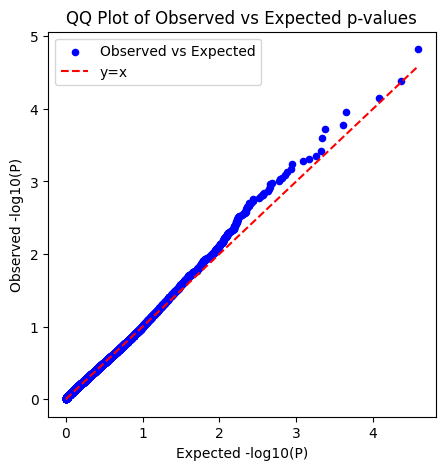

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

file_format = 'pdf'
np.random.seed(1234)

save_dir = '../../results/Rep11_MOB/'

# df1 = pd.read_csv(save_dir + 'p_values_spark.csv', index_col=0, header=0)
for i in range(5):
    df = pd.read_csv(save_dir + f'p_values_permute_{i}.csv', index_col=0, header=0)
    df = df['p_values']
    if i == 0:
        df_p = df
    else:
        df_p = pd.concat([df_p, df], axis=1, join='inner')

df_p = df_p.apply(lambda col: col.sort_values().reset_index(drop=True))
df_p = np.mean(df_p.values, axis=1)

random_numbers = np.random.uniform(0, 1, df_p.shape[0])

observed_sorted = np.sort(df_p)
expected_sorted = np.sort(random_numbers)

log_observed = -np.log10(observed_sorted)
log_expected = -np.log10(expected_sorted)

plt.figure(figsize=(5, 5))
plt.scatter(log_expected, log_observed, color='blue', label="Observed vs Expected", s=20)
plt.plot([0, max(log_expected)], [0, max(log_expected)], color='red', linestyle='--', label='y=x')
plt.xlabel('Expected -log10(P)')
plt.ylabel('Observed -log10(P)')
plt.title('QQ Plot of Observed vs Expected p-values')
plt.legend()
# plt.savefig(save_dir + f'p_values_permute.{file_format}')
plt.show()

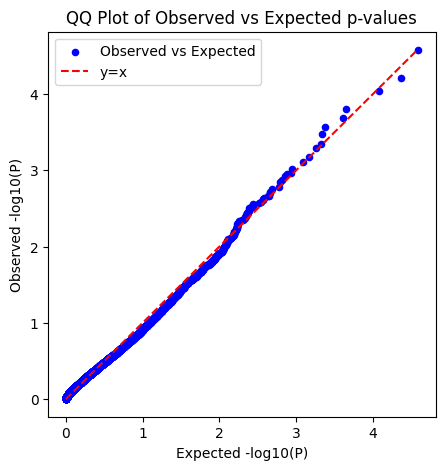

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

file_format = 'png'
np.random.seed(1234)

for i in range(5):
    df = pd.read_csv(save_dir + f'SPARK_R_p_values_permute_{i}.csv', index_col=0, header=0)
    df = df['combined_pvalue']
    if i == 0:
        df_p = df
    else:
        df_p = pd.concat([df_p, df], axis=1, join='inner')

df_p = df_p.apply(lambda col: col.sort_values().reset_index(drop=True))
df_p = np.mean(df_p.values, axis=1)

random_numbers = np.random.uniform(0, 1, df_p.shape[0])

observed_sorted = np.sort(df_p)
expected_sorted = np.sort(random_numbers)

log_observed = -np.log10(observed_sorted)
log_expected = -np.log10(expected_sorted)

plt.figure(figsize=(5, 5))
plt.scatter(log_expected, log_observed, color='blue', label="Observed vs Expected", s=20)
plt.plot([0, max(log_expected)], [0, max(log_expected)], color='red', linestyle='--', label='y=x')
plt.xlabel('Expected -log10(P)')
plt.ylabel('Observed -log10(P)')
plt.title('QQ Plot of Observed vs Expected p-values')
plt.legend()
# plt.savefig(save_dir + f'SPARK_R_p_values_permute.{file_format}')
plt.show()

### Plot results

In [8]:
from plot_utils import plot_gene_expression
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

save_dir = '../../results/Rep11_MOB/'

adata = sc.read_h5ad(save_dir + "filtered_data.h5ad")

df1 = pd.read_csv(save_dir + 'p_values_spark.csv', index_col=0, header=0)

alpha = 0.01
svg_list = df1[df1['adj_p_values'] < alpha].index.tolist()

selected_list = ['Doc2g', 'Eomes', 'Kcnj10', 'Atp1b1',
                 'Cldn5', 'Pmepa1', 'Vat1l', 'Gng13', 'Frzb', 'Kctd12', 
                 'Penk', 'Pcp4', 'Ube2ql1', 'Sez6', 'Camk2a']

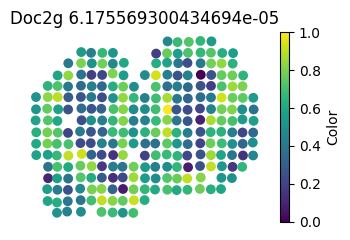

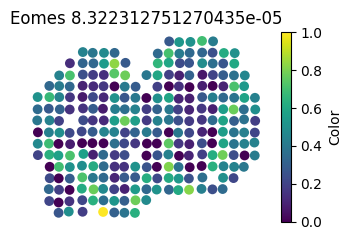

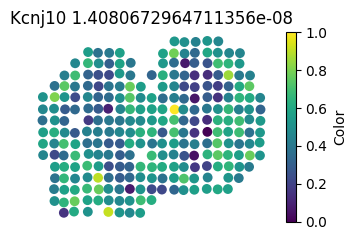

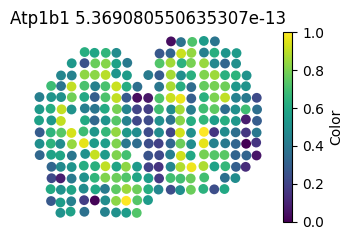

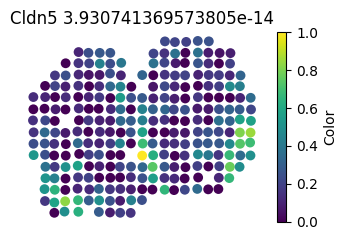

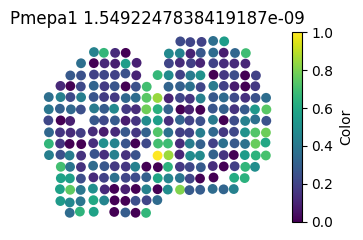

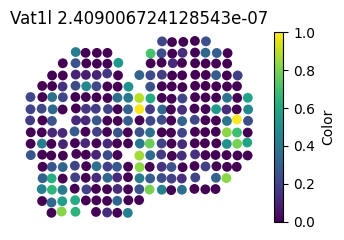

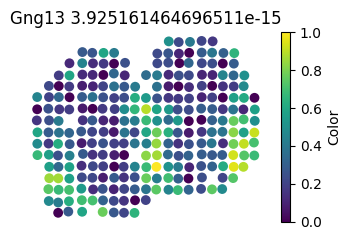

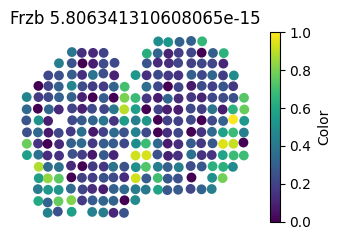

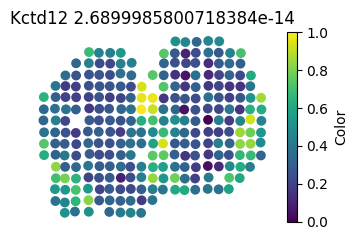

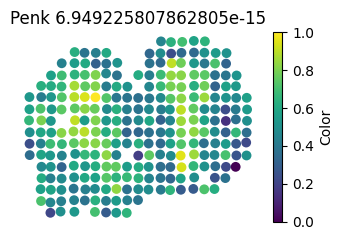

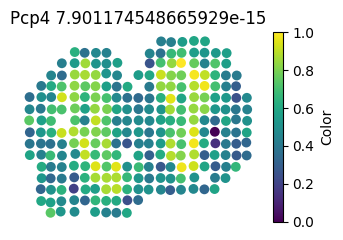

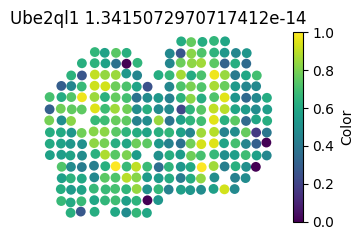

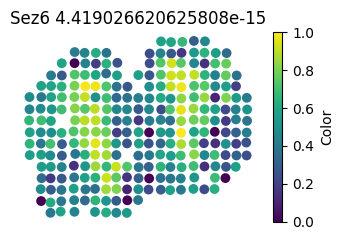

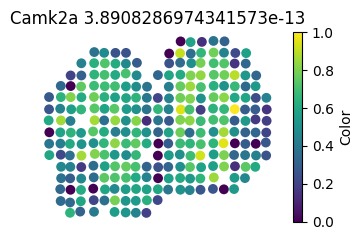

In [10]:
file_format = 'pdf'
for gene in selected_list:
    plot_gene_expression(adata, 'spatial', gene, log_norm=True, y_inverse=False,
                         cmap='viridis', figsize=(3.5, 2.5), s=200,
                         titlesize=12, norm0to1=True, title=f"{gene} {str(df1['adj_p_values'][gene])}", 
                         save_path=save_dir + f'{gene}.{file_format}', save=False, show=True)

### Compare with the R version of SPARK

In [58]:
save_dir = '../../results/Rep11_MOB/'

adata = sc.read_h5ad(save_dir + "filtered_data.h5ad")

df1 = pd.read_csv(save_dir + 'p_values_spark.csv', index_col=0, header=0)
df2 = pd.read_csv(save_dir + 'SPARK_R_p_values.csv', index_col=0, header=0)
# print(df2.shape)

alpha = 0.01
svg_list_my = df1[df1['adj_p_values'] < alpha].index.tolist()
svg_list_r = df2[df2['adjusted_pvalue'] < alpha].index.tolist()

print(len(svg_list_my), len(svg_list_r))

3146 594
